<a href="https://colab.research.google.com/github/sevvaluluss/Artificial-Intelligence-Lesson-/blob/main/Lab_03_Sevval_Ulus_Memis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSCI-408/508: Lab 3

**Sevval Ulus Memis**

[PLACEHOLDER_FOR_NOTEBOOK_LINK]


## Getting Started

Follow the instructions below to copy this notebook and to perform some initial setup.

1. Copy this notebook by selecting `File > Save a copy in Drive`.
2. A new window should open for the copied notebook. Move the new notebook to your course folder in Google Drive by selecting `File > Move` and then selecting the desired folder.
3. Update the name of the notebook by removing "Copy of" and replacing "Username" with your actual username.
4. Update the first cell in the notebook to replace "**Student Name**" with your actual name.
5. **Do not edit the line that says `PLACEHOLDER_FOR_NOTEBOOK_LINK`.** This will be used by the [Notebook Renderer](https://colab.research.google.com/drive/1CJTipys46ldZxJFwnt7XbdjQUfkmoXeU?usp=sharing) tool to insert a link to your Colab notebook.
6. Enable link sharing for your notebook.

## Preparing the Colab Environment

Run the cell below to download the course package.

In [1]:
%%capture
!rm dsci_408 -r
!git clone https://github.com/drbeane/dsci_408.git

Run the cell below to import the necessary tools for this assignment. **No other import statements are required for this Lab, and no other import statements should be included in this assignment.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

np.set_printoptions(suppress=True)

# Displaying DataFrames

In this assignment (and in future assignments), you will be asked to display several DataFrames. When doing so, please do not use the `print()` function. DataFrames are better displayed using the `display()` function. Alternately, you can place the name of a DataFrame as the last line of any code cell, and this will display it as if you had used `display()`.

# Part 1 - Prepare the Data

In this assignment, you will be working with data from the 1994 US Census. Our goal will be to create a model to predict whether or not an individual has an annual salary greater than $50,000 based on various demographic factors. You can find more information about the dataset, including a description of the features here: [Census Income Dataset](https://archive.ics.uci.edu/dataset/2/adult).



## 1.A - Load the Data

The dataset can be found at `dsci_408/data/census.csv`. Use the cell below to load the dataset into a Pandas DataFrame. Shuffle the dataset (setting `random_state=1`), print its shape, and then display the head of the DataFrame.

In [3]:
df = pd.read_csv("dsci_408/data/census.csv")
df = df.sample(frac=1, random_state=1).reset_index(drop=True)
df.shape
df.head()

,age,workclass,fnlwgt,education,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
0,24,Private,336088,HS-grad,9,Divorced,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Female,0,0,50,United-States,<=50K
1,34,Federal-gov,190228,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,1902,48,United-States,>50K
2,18,Private,104704,HS-grad,9,Never-married,Adm-clerical,Own-child,Black,Male,0,0,40,United-States,<=50K
3,44,Private,36271,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
4,27,Private,178709,Masters,14,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K


Your DataFrame should contain 32,561 rows. Each record in the DataFrame represents a single individual.

Some important information about the columns of the DataFrame is provided below.

- The `income` column is a binary categorial variable. **This is our target variable.**
- All other columns represent features to be used in the model.
- All features containing numerical values are numerical features.
- All features containing string values are categorical features.


## 1.B - Missing Values

Use the `isnull()` and `sum()` methods to determine the number of missing values in each column of the dataframe. Use `to_frame()` and `T` to display the missing counts as a DataFrame with a single row. You should see that there are 3 features containing missing values.

In [4]:
missing_counts = df.isnull().sum()
missing_counts_df = missing_counts.to_frame().T
missing_counts_df

,age,workclass,fnlwgt,education,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
0,0,1836,0,0,0,0,1843,0,0,0,0,0,0,583,0


## 1.C - Label Distribution

In the cell below, use `value_counts()` to display the a DataFrame showing the proportions of observations with each possible label for the target variable. Set `normalize=True` to show proportions instead of counts.

In [5]:
df["income"].value_counts(normalize=True).to_frame().T

income,<=50K,>50K
proportion,0.75919,0.24081


## 1.D - Features

You should see that there are two possible labels: `"<=50K"` and `">50K"`. For the sake of the assignment, we will consider `">50K"` to be the "Positive" label.

In the cell below, create three lists, as described below:
* Create a list named `num_features` containing the names of the numerical features.
* Create a list named `cat_features` containing the names of the categorical features.
* Create a list named `features` containing the names of all features.


Print the `num_features` and the `cat_features` lists.

**Note: Check your work here carefully. If you include incorrect columns in your feature array, that could invalidate your model, severely impacting your grade.**


In [6]:
num_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = df.select_dtypes(include=["object"]).columns.tolist()

cat_features.remove("income")
features = num_features + cat_features

num_features
cat_features

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

Replace the blank in the cell below with the name of your DataFrame to display the number of levels for each categorical feature.

In [7]:
df[cat_features].nunique().to_frame().T

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,8,16,7,14,6,5,2,41


## 1.E - Preprocessing Pipeline

Use the next code cell to create the three objects described below.

* Create a `Pipeline` object named `num_transformer`.
    * This pipeline should have a single step, which will be an instance of `StandardScaler()`.
* Create a `Pipeline` object named `cat_transformer`.
    * This pipeline will contain two steps.
    * The first step should be a `SimpleImputer` with parameteres `strategy='constant'` and  `fill_value='Missing'`.
    * The second step should be a `OneHotEncoder` with parameters `handle_unknown='ignore'` and  `drop='first'`.
* Create a `ColumnTransformer` object named `preprocessor`.
    * This object should contain the two pipelines above.
    * Make sure that each pipeline is applied to the correct features.

In [8]:
num_transformer = Pipeline(steps=[("scaler", StandardScaler())])

cat_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="Missing")),
        ("onehot", OneHotEncoder(handle_unknown="ignore", drop="first")),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features),
    ]
)

The `preprocessor` object will be included in another pipeline in the next section. But for the sake of getting information about the processed features, we will apply the object to the labelled data.

In the cell below, used `fit_transform()` to apply `preprocessor` to the census DataFrame. Store the results in a variable named `X_proc`. Then print the shape of `X_proc`. Note that we will not use `X_proc` in any later sections of this notebook.

In [9]:
X_proc = preprocessor.fit_transform(df[features])
X_proc.shape

(32561, 100)

Use the `get_feature_names_out()` method to extract the names that have been assigned to the processed features. Print the first 20 of new features names.

In [10]:
preprocessor.get_feature_names_out()[:20]

array(['num__age', 'num__fnlwgt', 'num__educ_num', 'num__capital_gain',
       'num__capital_loss', 'num__hrs_per_week',
       'cat__workclass_Local-gov', 'cat__workclass_Missing',
       'cat__workclass_Never-worked', 'cat__workclass_Private',
       'cat__workclass_Self-emp-inc', 'cat__workclass_Self-emp-not-inc',
       'cat__workclass_State-gov', 'cat__workclass_Without-pay',
       'cat__education_11th', 'cat__education_12th',
       'cat__education_1st-4th', 'cat__education_5th-6th',
       'cat__education_7th-8th', 'cat__education_9th'], dtype=object)

## 1.F - Feature and Labels

Create a label array (or series) named `y` and a label DataFrame named `X`. Note that `X` must be a DataFrame because we need the features names for use with the preprocessor.

Print the shapes of `X` and `y`.

In [11]:
X = df[features]
y = df["income"]

X.shape
y.shape

(32561,)

# Part 2 - Train and Evaluate Model

In this section, we will train and evaluate a logistic regression model on the dataset.

## 2.A - Create Pipeline

Use the cell below to create a `Pipeline` object with two steps. The first step should be the `preprocessor` object created in Part 1. The second step should be a `LogisticRegression` object.

In [12]:
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("logreg", LogisticRegression(max_iter=1000)),
    ]
)

## 2.B - Fit Model

Use the cell below to fit the `Pipeline` to the labeled data. Then print the intercept and coefficients of the trained model.

In [13]:
model.fit(X, y)
model.named_steps["logreg"].intercept_
model.named_steps["logreg"].coef_
new_features = model.named_steps["preprocessor"].get_feature_names_out()
new_features[:20]

array(['num__age', 'num__fnlwgt', 'num__educ_num', 'num__capital_gain',
       'num__capital_loss', 'num__hrs_per_week',
       'cat__workclass_Local-gov', 'cat__workclass_Missing',
       'cat__workclass_Never-worked', 'cat__workclass_Private',
       'cat__workclass_Self-emp-inc', 'cat__workclass_Self-emp-not-inc',
       'cat__workclass_State-gov', 'cat__workclass_Without-pay',
       'cat__education_11th', 'cat__education_12th',
       'cat__education_1st-4th', 'cat__education_5th-6th',
       'cat__education_7th-8th', 'cat__education_9th'], dtype=object)

Replace the blank in the cell below with the name of your final pipeline and then run the cell to display a DataFrame reporting the model coefficients.

In [14]:
coefs_df = pd.DataFrame(
    {"coef": model.named_steps["logreg"].coef_[0]},
    index=new_features
)
coefs_df.T

,num__age,num__fnlwgt,num__educ_num,num__capital_gain,num__capital_loss,num__hrs_per_week,cat__workclass_Local-gov,cat__workclass_Missing,cat__workclass_Never-worked,cat__workclass_Private,...,cat__native_country_Portugal,cat__native_country_Puerto-Rico,cat__native_country_Scotland,cat__native_country_South,cat__native_country_Taiwan,cat__native_country_Thailand,cat__native_country_Trinadad&Tobago,cat__native_country_United-States,cat__native_country_Vietnam,cat__native_country_Yugoslavia
coef,0.34675,0.074803,0.773576,2.30953,0.259912,0.365943,-0.649935,-0.527814,-0.117555,-0.467075,...,0.044655,-0.17506,0.041317,-0.892034,0.101184,-0.285478,-0.167791,0.281276,-0.890017,0.523637


## 2.C - Accuracy

Use the `score()` method to calculate the training accuracy for the model.

In [15]:
model.score(X, y)

0.853075765486318

Use `cross_val_score()` to estimate the model's out of-sample accuracy using 10-fold cross-validation.

Print the CV-score for the model rounded to 4 decimal places.

You do not need to print the scores for the individual folds.

In [16]:
cv_scores = cross_val_score(model, X, y, cv=10)
np.round(cv_scores.mean(), 4)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


np.float64(0.8525)

## 2.D - Confusion Matrix

Use `cross_val_predict()` to generate class predictions for each observation using 10-fold cross-validation. Then use the CV predictions to generate a confusion matrix for the model. Display the matrix as a DataFrame. When creating the DataFrame, set `columns=['<=50K', '>50K']` and `index=['<=50K', '>50K']` to specify row and column names.

In [17]:
y_pred = cross_val_predict(model, X, y, cv=10)
cm = confusion_matrix(y, y_pred, labels=["<=50K", ">50K"])
pd.DataFrame(cm, columns=["<=50K", ">50K"], index=["<=50K", ">50K"])

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,<=50K,>50K
<=50K,23031,1689
>50K,3113,4728


## 2.E - Classification Report

In the cell below, create and print a classification report based on the CV predictions.

In [18]:
classification_report(y, y_pred)

'              precision    recall  f1-score   support\n\n       <=50K       0.88      0.93      0.91     24720\n        >50K       0.74      0.60      0.66      7841\n\n    accuracy                           0.85     32561\n   macro avg       0.81      0.77      0.78     32561\nweighted avg       0.85      0.85      0.85     32561\n'

# Part 3 - Applying the Model

## 3.A - Loading New Data

Feature values for several additional observations can be found in the file `'dsci_408/data/census_new.csv'`. Load this data into a new DataFrame. Print the shape of the dataframe and display its head. You do not need to shuffle the new data.

In [19]:
df_new = pd.read_csv("dsci_408/data/census_new.csv")
df_new.shape
df_new.head()

,age,workclass,fnlwgt,education,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country
0,35,State-gov,456110,Bachelors,9,Married-civ-spouse,Sales,Own-child,White,Male,0,0,20,United-States
1,29,Private,158506,10th,4,Married-civ-spouse,Other-service,Not-in-family,White,Female,0,0,40,United-States
2,43,Private,228320,10th,9,Divorced,Craft-repair,Husband,Other,Male,0,0,48,Thailand
3,20,Private,248990,1st-4th,10,Widowed,Tech-support,Husband,White,Female,0,0,50,United-States
4,80,Private,137651,Some-college,9,Never-married,Machine-op-inspct,Husband,White,Male,0,0,16,United-States


## 3.B - Generate Class Predictions

Apply the model to the DataFrame containing the new feature values to generate class predictions. Print the first 10 predictions.

In [20]:
new_preds = model.predict(df_new)
new_preds[:10]

array(['<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '>50K', '<=50K',
       '<=50K', '<=50K', '<=50K'], dtype=object)

Calculate aand print the proportion of new observations for which the model predicts the positive class.

In [21]:
(new_preds == ">50K").mean()

np.float64(0.146)

## 3.C - Generate Probability Estimates

Next, use the model to generate class probability estimates for each of the new observations. Print the first 10 rows of the probability array.

In [22]:
new_probs = model.predict_proba(df_new)
new_probs[:10]

array([[0.94064936, 0.05935064],
       [0.98727904, 0.01272096],
       [0.97176868, 0.02823132],
       [0.91127803, 0.08872197],
       [0.97080103, 0.02919897],
       [0.3355267 , 0.6644733 ],
       [0.9016053 , 0.0983947 ],
       [0.69160069, 0.30839931],
       [0.83217248, 0.16782752],
       [0.97594104, 0.02405896]])

Fill in the blank in the cell below to create a histogram of the positive-class probability estimates for the new observations.

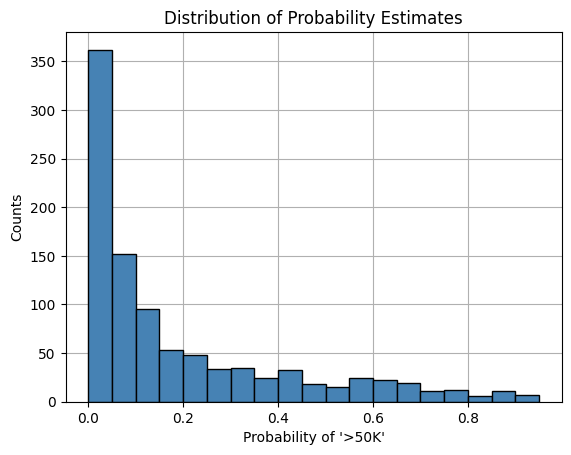

In [23]:
plt.hist(new_probs[:, 1], bins=np.arange(0, 1, 0.05), color="steelblue", edgecolor="k", zorder=2)
plt.title("Distribution of Probability Estimates")
plt.xlabel("Probability of '>50K'")
plt.ylabel("Counts")
plt.grid()
plt.show()

# Submission Instructions

1. Perform a Restart and Run All by clicking **Runtime > Restart session and run all**.
2. Copy the link to your notebook by clicking **Share > Copy Link**.
3. Paste the copied link into the `notebook_url` field in the [Notebook Renderer](https://colab.research.google.com/drive/1CJTipys46ldZxJFwnt7XbdjQUfkmoXeU?usp=sharing) tool and then execute the cell to render the notebook.
4. The Notebook Renderer will open up a save file dialog. Save the resulting HTML file yo your local machine.
5. Submit the HTML file to Canvas.
